# Exploring merged Spotify Charts and Track Data

In this notebook, I finally merge my custom, cleaned "Spotify Top 50 Charts (2017-2021, for 50 countries)" dataset (`spotify_charts_cleaned.csv`) with all the track metadata I collected (`track_data_combined.csv`). Let's inspect the quality of the data and see if we can identify some interesting patterns in it!

In [1]:
from helpers import get_data_path, create_data_out_path, ROOT_DIR, DATA_DIR
import pandas as pd
from ast import literal_eval

In [2]:
tracks = pd.read_csv(
    get_data_path("track_data_combined.csv"),
    index_col="id",
    dtype={"album_type": "category"},
    converters={"genres": literal_eval},
    parse_dates=["album_release_date"]
)

In [3]:
tracks

,explicit,name,preview_url,album_type,album_id,album_release_date,album_release_date_precision,isrc,isrc_year,isrc_agency,...,tempo,duration_ms,time_signature,artist_id_1,artist_id_2,artist_id_3,artist_name_1,artist_name_2,artist_name_3,genres
id,,,,,,,,,,,,,,,,,,,,,
000RW47rhEkSqjgTrZx7YX,False,Lance Individual,https://p.scdn.co/mp3-preview/c64292f4c53560bc...,album,57h6WHDjwNGIs5NMeKYEoL,2021-04-22,day,BRRGE2010642,2020.0,Pro-música Brazil,...,117.399,164459.0,4.0,1elUiq4X7pxej6FRlrEzjM,NaN,NaN,Jorge & Mateus,NaN,NaN,"[arrocha, sertanejo, sertanejo universitario]"
000xQL6tZNLJzIrtIgxqSl,False,Still Got Time (feat. PARTYNEXTDOOR),https://p.scdn.co/mp3-preview/83fad967740b8a85...,single,2kGUeTGnkLOYlinKRJe47G,2017-03-23,day,USRC11700675,2017.0,RIAA,...,120.963,188491.0,4.0,5ZsFI1h6hIdQRw2ti0hz81,2HPaUgqeutzr3jx5a9WyDV,NaN,ZAYN,PARTYNEXTDOOR,NaN,"[dance pop, pop, post-teen pop, uk pop, r&b, r..."
000xYdQfIZ4pDmBGzQalKU,False,"Eu, Você, O Mar e Ela",https://p.scdn.co/mp3-preview/ae0e943883e06623...,album,4QianJs5Ls4mxwcT7gDBww,2016-11-04,day,BRRGE1603547,2016.0,Pro-música Brazil,...,166.018,187119.0,4.0,3qvcCP2J0fWi0m0uQDUf6r,NaN,NaN,Luan Santana,NaN,NaN,"[arrocha, sertanejo, sertanejo pop, sertanejo ..."
001b8t3bYPfnabpjpfG1Y4,True,Geen Stof,https://p.scdn.co/mp3-preview/535320aa4cbc5811...,album,06v2EPzWTwcP0egTJVrPdU,2021-01-21,day,NLG662000948,2020.0,SENA,...,95.951,167866.0,4.0,1wFoE1RwBMWoWkXcFrCgsx,NaN,NaN,Josylvio,NaN,NaN,[dutch hip hop]
003VDDA7J3Xb2ZFlNx7nIZ,True,YELL OH,https://p.scdn.co/mp3-preview/14e659590d1a70cf...,single,2orYogfKeURqyS1hRP1vZ4,2020-02-07,day,QZJ842000061,2020.0,RIAA,...,74.496,236779.0,4.0,6Xgp2XMz1fhVYe7i6yNAax,50co4Is1HCEo8bhOyUWKpn,NaN,Trippie Redd,Young Thug,NaN,"[melodic rap, rap, trap, atl hip hop, atl trap..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7zxphfIdUMOfZOAVpKFlld,True,Trapper Of The Year (Intro),https://p.scdn.co/mp3-preview/b48d68019fc66831...,single,65DP4VYecvLUlUVfCsXPLF,2021-11-19,day,SE6XY2184006,2021.0,IFPI Sweden,...,121.913,110164.0,4.0,2Dor6diK1zw9BEluKBOdoA,NaN,NaN,23,NaN,NaN,"[swedish drill, swedish hip hop, swedish trap ..."
7zyYmIdjqqiX6kLryb7QBx,False,以後別做朋友,https://p.scdn.co/mp3-preview/4d243321f0ec66ba...,album,1JEzXcEYuEFKKmo4mfMgC7,2014-12-19,day,TWA471410001,2014.0,RIT,...,130.576,260573.0,4.0,5fEQLwq1BWWQNR8GzhOIvi,NaN,NaN,Eric Chou,NaN,NaN,[mandopop]
7zyZ9yPXIQebb79PrMghpV,False,Zap Zum,https://p.scdn.co/mp3-preview/2f82c76f077fb377...,album,194szTkDIGJsa9iZJNStwN,2021-06-24,day,BCM112100037,2021.0,Pro-música Brazil,...,169.123,167503.0,4.0,6tzRZ39aZlNqlUzQlkuhDV,NaN,NaN,Pabllo Vittar,NaN,NaN,"[dance pop, funk carioca, funk pop, pop, pop l..."


In [4]:
charts = pd.read_csv(get_data_path("spotify_charts_cleaned.csv"), index_col="id", parse_dates=["date"], dtype={"region": "category"})
charts

,region,date,rank,streams
id,,,,
6mICuAdrwEjh6Y6lroV2Kg,Argentina,2017-01-01,1,253019.0
7DM4BPaS7uofFul3ywMe46,Argentina,2017-01-01,2,223988.0
3AEZUABDXNtecAOSC1qTfo,Argentina,2017-01-01,3,210943.0
6rQSrBHf7HlZjtcMZ4S4bO,Argentina,2017-01-01,4,173865.0
58IL315gMSTD37DOZPJ2hf,Argentina,2017-01-01,5,153956.0
...,...,...,...,...
4aXicRG47bBEcKXlDaSRwW,Uruguay,2021-08-13,25,11431.0
43qcs9NpJhDxtG91zxFkj7,Uruguay,2021-08-13,27,10946.0
4M4DTyLupKvbJKlE4I4EYq,Uruguay,2021-08-13,33,9994.0


In [5]:
track_charts = charts.join(tracks)
track_charts

,region,date,rank,streams,explicit,name,preview_url,album_type,album_id,album_release_date,...,tempo,duration_ms,time_signature,artist_id_1,artist_id_2,artist_id_3,artist_name_1,artist_name_2,artist_name_3,genres
id,,,,,,,,,,,,,,,,,,,,,
000RW47rhEkSqjgTrZx7YX,Brazil,2021-04-23,14,548706.0,False,Lance Individual,https://p.scdn.co/mp3-preview/c64292f4c53560bc...,album,57h6WHDjwNGIs5NMeKYEoL,2021-04-22,...,117.399,164459.0,4.0,1elUiq4X7pxej6FRlrEzjM,NaN,NaN,Jorge & Mateus,NaN,NaN,"[arrocha, sertanejo, sertanejo universitario]"
000RW47rhEkSqjgTrZx7YX,Brazil,2021-04-24,14,714162.0,False,Lance Individual,https://p.scdn.co/mp3-preview/c64292f4c53560bc...,album,57h6WHDjwNGIs5NMeKYEoL,2021-04-22,...,117.399,164459.0,4.0,1elUiq4X7pxej6FRlrEzjM,NaN,NaN,Jorge & Mateus,NaN,NaN,"[arrocha, sertanejo, sertanejo universitario]"
000RW47rhEkSqjgTrZx7YX,Brazil,2021-04-25,15,587405.0,False,Lance Individual,https://p.scdn.co/mp3-preview/c64292f4c53560bc...,album,57h6WHDjwNGIs5NMeKYEoL,2021-04-22,...,117.399,164459.0,4.0,1elUiq4X7pxej6FRlrEzjM,NaN,NaN,Jorge & Mateus,NaN,NaN,"[arrocha, sertanejo, sertanejo universitario]"
000RW47rhEkSqjgTrZx7YX,Brazil,2021-04-26,17,386706.0,False,Lance Individual,https://p.scdn.co/mp3-preview/c64292f4c53560bc...,album,57h6WHDjwNGIs5NMeKYEoL,2021-04-22,...,117.399,164459.0,4.0,1elUiq4X7pxej6FRlrEzjM,NaN,NaN,Jorge & Mateus,NaN,NaN,"[arrocha, sertanejo, sertanejo universitario]"
000RW47rhEkSqjgTrZx7YX,Brazil,2021-04-27,19,387562.0,False,Lance Individual,https://p.scdn.co/mp3-preview/c64292f4c53560bc...,album,57h6WHDjwNGIs5NMeKYEoL,2021-04-22,...,117.399,164459.0,4.0,1elUiq4X7pxej6FRlrEzjM,NaN,NaN,Jorge & Mateus,NaN,NaN,"[arrocha, sertanejo, sertanejo universitario]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7zzhknA0A39TH81meuX7WA,France,2019-12-08,34,95557.0,True,C'est pas des LOL,https://p.scdn.co/mp3-preview/5724fd69cc6a400c...,album,3Jtj1RlmKnRvBkp3YJWHXO,2019-10-04,...,132.004,279467.0,4.0,3IW7ScrzXmPvZhB27hmfgy,NaN,NaN,Jul,NaN,NaN,"[francoton, rap marseille]"
7zzhknA0A39TH81meuX7WA,France,2019-12-09,33,100571.0,True,C'est pas des LOL,https://p.scdn.co/mp3-preview/5724fd69cc6a400c...,album,3Jtj1RlmKnRvBkp3YJWHXO,2019-10-04,...,132.004,279467.0,4.0,3IW7ScrzXmPvZhB27hmfgy,NaN,NaN,Jul,NaN,NaN,"[francoton, rap marseille]"
7zzhknA0A39TH81meuX7WA,France,2019-12-10,36,95798.0,True,C'est pas des LOL,https://p.scdn.co/mp3-preview/5724fd69cc6a400c...,album,3Jtj1RlmKnRvBkp3YJWHXO,2019-10-04,...,132.004,279467.0,4.0,3IW7ScrzXmPvZhB27hmfgy,NaN,NaN,Jul,NaN,NaN,"[francoton, rap marseille]"


In [6]:
columns_to_move = ["name", "artist_name_1", "artist_name_2", "artist_name_3"]
for col_name in reversed(columns_to_move):
  col = track_charts.pop(col_name)
  track_charts.insert(3, col_name, col)

In [7]:
track_charts

,region,date,rank,name,artist_name_1,artist_name_2,artist_name_3,streams,explicit,preview_url,...,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,artist_id_1,artist_id_2,artist_id_3,genres
id,,,,,,,,,,,,,,,,,,,,,
000RW47rhEkSqjgTrZx7YX,Brazil,2021-04-23,14,Lance Individual,Jorge & Mateus,NaN,NaN,548706.0,False,https://p.scdn.co/mp3-preview/c64292f4c53560bc...,...,0.0,0.075,0.962,117.399,164459.0,4.0,1elUiq4X7pxej6FRlrEzjM,NaN,NaN,"[arrocha, sertanejo, sertanejo universitario]"
000RW47rhEkSqjgTrZx7YX,Brazil,2021-04-24,14,Lance Individual,Jorge & Mateus,NaN,NaN,714162.0,False,https://p.scdn.co/mp3-preview/c64292f4c53560bc...,...,0.0,0.075,0.962,117.399,164459.0,4.0,1elUiq4X7pxej6FRlrEzjM,NaN,NaN,"[arrocha, sertanejo, sertanejo universitario]"
000RW47rhEkSqjgTrZx7YX,Brazil,2021-04-25,15,Lance Individual,Jorge & Mateus,NaN,NaN,587405.0,False,https://p.scdn.co/mp3-preview/c64292f4c53560bc...,...,0.0,0.075,0.962,117.399,164459.0,4.0,1elUiq4X7pxej6FRlrEzjM,NaN,NaN,"[arrocha, sertanejo, sertanejo universitario]"
000RW47rhEkSqjgTrZx7YX,Brazil,2021-04-26,17,Lance Individual,Jorge & Mateus,NaN,NaN,386706.0,False,https://p.scdn.co/mp3-preview/c64292f4c53560bc...,...,0.0,0.075,0.962,117.399,164459.0,4.0,1elUiq4X7pxej6FRlrEzjM,NaN,NaN,"[arrocha, sertanejo, sertanejo universitario]"
000RW47rhEkSqjgTrZx7YX,Brazil,2021-04-27,19,Lance Individual,Jorge & Mateus,NaN,NaN,387562.0,False,https://p.scdn.co/mp3-preview/c64292f4c53560bc...,...,0.0,0.075,0.962,117.399,164459.0,4.0,1elUiq4X7pxej6FRlrEzjM,NaN,NaN,"[arrocha, sertanejo, sertanejo universitario]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7zzhknA0A39TH81meuX7WA,France,2019-12-08,34,C'est pas des LOL,Jul,NaN,NaN,95557.0,True,https://p.scdn.co/mp3-preview/5724fd69cc6a400c...,...,0.0,0.094,0.886,132.004,279467.0,4.0,3IW7ScrzXmPvZhB27hmfgy,NaN,NaN,"[francoton, rap marseille]"
7zzhknA0A39TH81meuX7WA,France,2019-12-09,33,C'est pas des LOL,Jul,NaN,NaN,100571.0,True,https://p.scdn.co/mp3-preview/5724fd69cc6a400c...,...,0.0,0.094,0.886,132.004,279467.0,4.0,3IW7ScrzXmPvZhB27hmfgy,NaN,NaN,"[francoton, rap marseille]"
7zzhknA0A39TH81meuX7WA,France,2019-12-10,36,C'est pas des LOL,Jul,NaN,NaN,95798.0,True,https://p.scdn.co/mp3-preview/5724fd69cc6a400c...,...,0.0,0.094,0.886,132.004,279467.0,4.0,3IW7ScrzXmPvZhB27hmfgy,NaN,NaN,"[francoton, rap marseille]"


In [8]:
track_charts = track_charts.sort_values(["date", "region", "rank"])

## Exporting data?

We could in theory export the data. However, the dataset becomes HUGE (2 GB). This is probably too much for practical applications, especially if the data should be made available via an interactive website.

In [9]:
#track_charts.to_csv(create_data_out_path("track_charts.csv"))

## Checking completeness of data

Ideally, we should have 50 entries per day for every region. This means that if we look at the value counts per region, we should ideally come close to:

In [10]:
ideal_value_count = 50 * 365 * 5 # top 50 for every day, across 5 years
ideal_value_count

91250

In [11]:
track_charts.region.value_counts()

Italy                 91147
Finland               91146
Denmark               91146
United Kingdom        91145
Netherlands           91145
Sweden                91144
Norway                91144
France                91144
Philippines           91144
United States         91144
Taiwan                91143
Hong Kong             91143
Hungary               91143
Malaysia              91142
Japan                 91142
New Zealand           91142
Australia             91142
Indonesia             91142
Ecuador               91142
Poland                91142
Singapore             91142
Chile                 91142
Canada                91142
Turkey                91142
Belgium               91142
Ireland               91142
Portugal              91141
Argentina             91141
Czech Republic        91141
Guatemala             91141
Bolivia               91141
Dominican Republic    91140
Mexico                91140
Colombia              91140
Costa Rica            91139
Honduras            

In [12]:
track_charts.region.value_counts().min() / ideal_value_count

0.9953972602739726

Even for the region with the weakest data coverage, we have 99.5% of the data. Nice!

Let's try to plot the data as well:

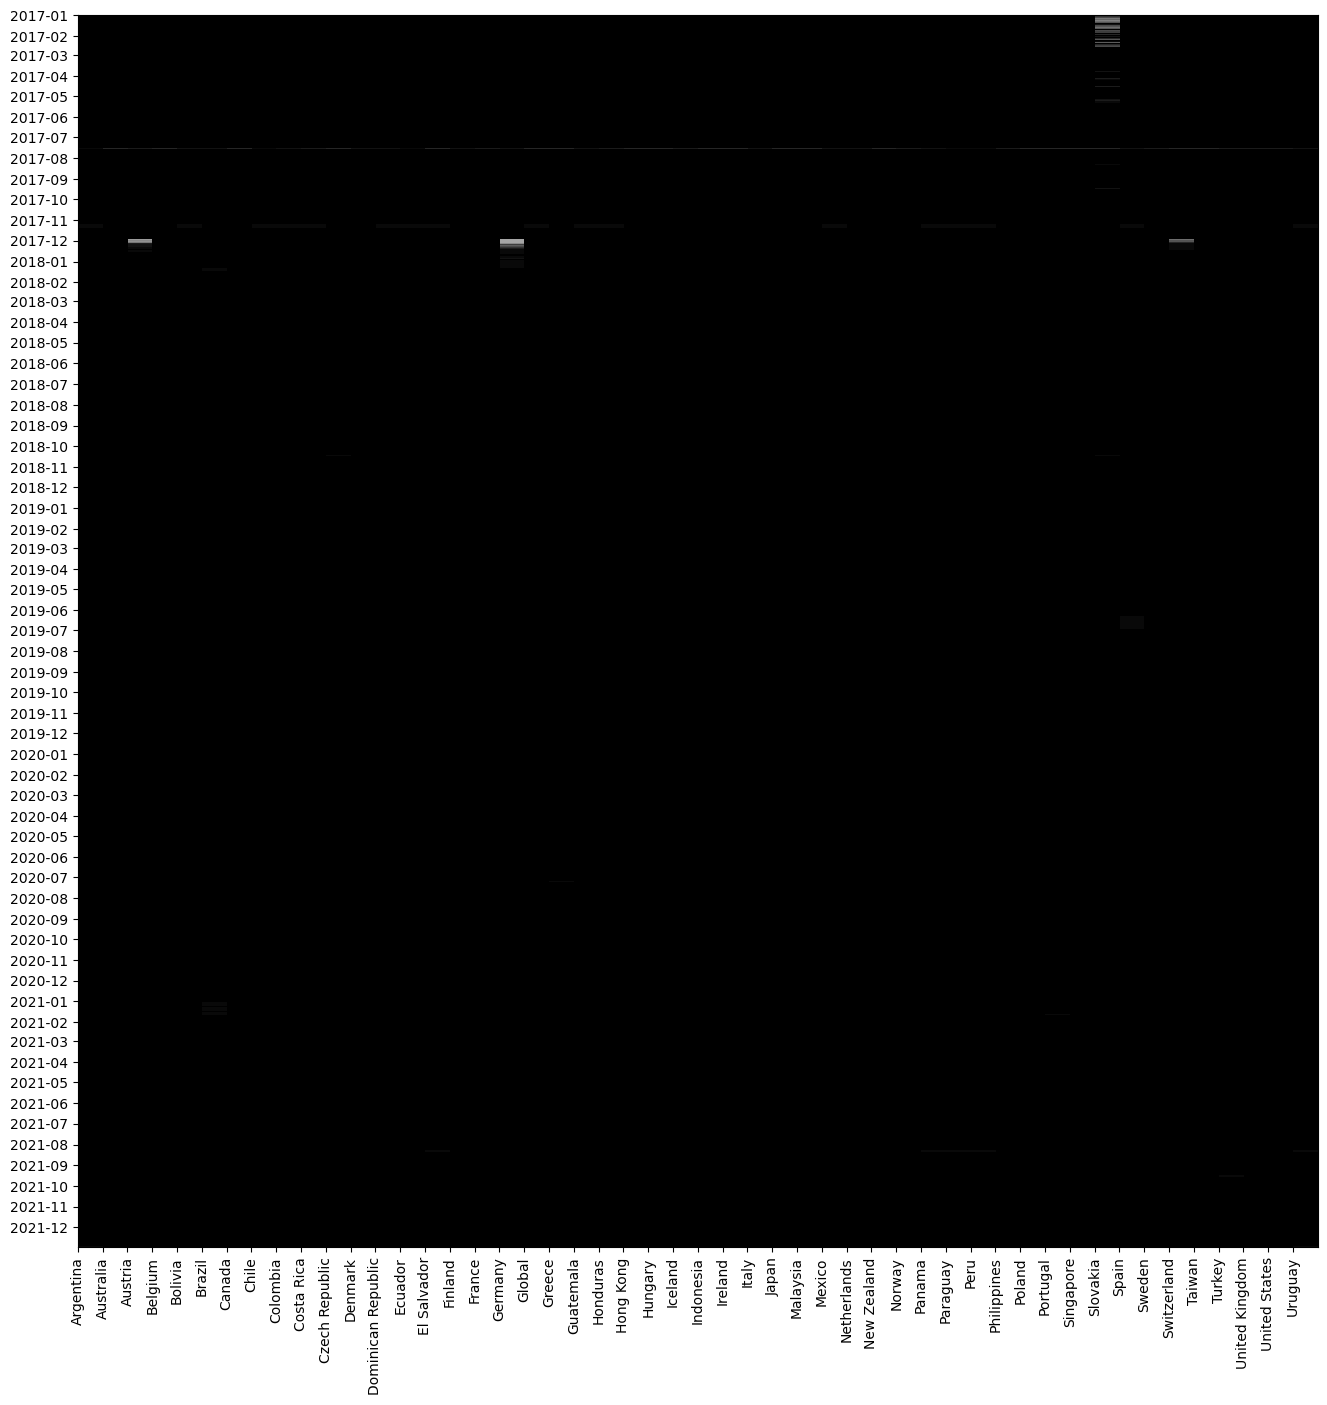

In [13]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

track_counts_per_region_and_date = track_charts.reset_index().groupby(["region", "date"]).id.count().rename("track_count").reset_index().set_index("date")

track_counts_by_region_pivot = track_counts_per_region_and_date.reset_index().pivot(
    columns=["region"], index="date", values="track_count"
)

plt.figure(figsize=(16, 16))
min_date = mdates.date2num(track_counts_per_region_and_date.index.min())
max_date = mdates.date2num(track_counts_per_region_and_date.index.max())

plt.xticks(ticks=list(range(len(track_counts_by_region_pivot.columns))), labels=track_counts_by_region_pivot.columns, rotation=90)

y_axis = plt.gca().yaxis
y_axis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
y_axis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
y_axis.set_major_locator(mdates.MonthLocator())

plt.imshow(
    track_counts_by_region_pivot,
    aspect="auto",
    extent=[0, 50, max_date, min_date],
    cmap="Greys",
    interpolation="none",
)
plt.show()

## Exploring the Data

In [32]:
global_charts = track_charts[track_charts.region == "Global"].drop(columns="region")
global_charts

,date,rank,name,artist_name_1,artist_name_2,artist_name_3,streams,explicit,preview_url,album_type,...,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,artist_id_1,artist_id_2,artist_id_3,genres
id,,,,,,,,,,,,,,,,,,,,,
5aAx2yezTd8zXrkmtKl66Z,2017-01-01,1,Starboy,The Weeknd,Daft Punk,NaN,3135625.0,True,NaN,album,...,0.000003,0.1340,0.535,186.054,230453.0,4.0,1Xyo4u8uXC1ZmMpatF05PJ,4tZwfgrHOc3mvqYlEYSvVi,NaN,"[canadian contemporary r&b, canadian pop, pop,..."
7BKLCZ1jbUBVqRi2FVlTVw,2017-01-01,2,Closer,The Chainsmokers,Halsey,NaN,3015525.0,False,https://p.scdn.co/mp3-preview/aacaac1614505dbb...,single,...,0.000000,0.1110,0.661,95.010,244960.0,4.0,69GGBxA162lTqCwzJG5jLp,26VFTg2z8YR0cCuwLzESi2,NaN,"[dance pop, edm, electropop, pop, pop dance, t..."
4pdPtRcBmOSQDlJ3Fk945m,2017-01-01,3,Let Me Love You,DJ Snake,Justin Bieber,NaN,2545384.0,False,NaN,album,...,0.000010,0.1220,0.142,199.864,205947.0,4.0,540vIaP2JwjQb9dm3aArA4,1uNFoZAHBGtllmzznpCI3s,NaN,"[dance pop, edm, electronic trap, pop, pop dan..."
5knuzwU65gJK7IF5yJsuaW,2017-01-01,4,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,Sean Paul,Anne-Marie,2356604.0,False,https://p.scdn.co/mp3-preview/afb53fb7e8ae5f5f...,single,...,0.000000,0.1800,0.742,101.965,251088.0,4.0,6MDME20pz9RveH9rEXvrOM,3Isy6kedDrgPYoTS1dazA9,1zNqDE7qDGCsyzJwohVaoX,"[dance pop, edm, pop, pop dance, post-teen pop..."
1xznGGDReH1oQq0xzbwXa3,2017-01-01,5,One Dance,Drake,Wizkid,Kyla,2259887.0,False,NaN,album,...,0.004230,0.3510,0.371,103.989,173987.0,4.0,3TVXtAsR1Inumwj472S9r4,3tVQdUvClmAT7URs9V3rsp,77DAFfvm3O9zT5dIoG0eIO,"[canadian hip hop, canadian pop, hip hop, rap,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1c4htMHiolERc0YJvZNdlc,2021-12-31,46,Vai Lá Em Casa Hoje,George Henrique & Rodrigo,Marília Mendonça,NaN,1680296.0,False,NaN,single,...,0.000000,0.9680,0.619,157.628,191524.0,4.0,3FlCKtwOEYQQYyGVEbxG2Z,1yR65psqiazQpeM79CcGh8,NaN,"[arrocha, sertanejo, sertanejo pop, sertanejo ..."
4gvrJnKCKIPiacNsWVQwEU,2021-12-31,47,love nwantiti (feat. Dj Yo! & AX'EL) - Remix,CKay,Dj Yo!,AX'EL,1675604.0,False,https://p.scdn.co/mp3-preview/165d7571df628c2c...,single,...,0.093800,0.0549,0.443,119.900,188369.0,3.0,048LktY5zMnakWq7PTtFrz,7iTLGcddv1bOPirdYJjKVy,5fUXK5m3BNwoRgTyKq8tnz,[afro r&b]
5wANPM4fQCJwkGd4rN57mH,2021-12-31,48,drivers license,Olivia Rodrigo,NaN,NaN,1674396.0,True,https://p.scdn.co/mp3-preview/3a145991602f4a73...,album,...,0.000014,0.1060,0.137,143.875,242013.0,4.0,1McMsnEElThX1knmY4oliG,NaN,NaN,[pop]


In [43]:
countries_charts = track_charts[track_charts.region != "Global"].copy()
countries_charts.region = countries_charts.region.cat.remove_unused_categories()
countries_charts

,region,date,rank,name,artist_name_1,artist_name_2,artist_name_3,streams,explicit,preview_url,...,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,artist_id_1,artist_id_2,artist_id_3,genres
id,,,,,,,,,,,,,,,,,,,,,
6mICuAdrwEjh6Y6lroV2Kg,Argentina,2017-01-01,1,Chantaje (feat. Maluma),Shakira,Maluma,NaN,253019.0,False,https://p.scdn.co/mp3-preview/b7a66b261ebbe2aa...,...,0.000030,0.1590,0.907,102.034,195840.0,4.0,0EmeFodog0BfCgMzAIvKQp,1r4hJ1h58CWwUQe3MxPuau,NaN,"[colombian pop, dance pop, latin pop, reggaeto..."
7DM4BPaS7uofFul3ywMe46,Argentina,2017-01-01,2,Vente Pa' Ca (feat. Maluma),Ricky Martin,Maluma,NaN,223988.0,False,https://p.scdn.co/mp3-preview/21e38a8983daf1c3...,...,0.000017,0.1010,0.533,99.935,259196.0,4.0,7slfeZO9LsJbWgpkIoXBUJ,1r4hJ1h58CWwUQe3MxPuau,NaN,"[dance pop, latin pop, mexican pop, puerto ric..."
3AEZUABDXNtecAOSC1qTfo,Argentina,2017-01-01,3,Reggaetón Lento (Bailemos),CNCO,NaN,NaN,210943.0,False,https://p.scdn.co/mp3-preview/ced5c17cadb43603...,...,0.000000,0.1760,0.710,93.974,222560.0,4.0,0eecdvMrqBftK0M1VKhaF4,NaN,NaN,"[boy band, latin pop, reggaeton]"
6rQSrBHf7HlZjtcMZ4S4bO,Argentina,2017-01-01,4,Safari,J Balvin,Pharrell Williams,BIA,173865.0,False,NaN,...,0.000003,0.1260,0.555,180.044,205600.0,4.0,1vyhD5VmyZ7KMfW5gqLgo5,2RdwBSPQiwcmiDo9kixcl8,6veh5zbFpm31XsPdjBgPER,"[reggaeton, reggaeton colombiano, trap latino,..."
58IL315gMSTD37DOZPJ2hf,Argentina,2017-01-01,5,Shaky Shaky,Daddy Yankee,NaN,NaN,153956.0,False,NaN,...,0.000000,0.0631,0.873,88.007,234320.0,4.0,4VMYDCV2IEDYJArk749S6m,NaN,NaN,"[latin hip hop, reggaeton, trap latino]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7iXJg4IUyrWont5YSQrbKP,Uruguay,2021-12-31,46,Los Tragos,Reik,Maria Becerra,NaN,10707.0,False,https://p.scdn.co/mp3-preview/0ac0ba472608a3f8...,...,0.000001,0.1610,0.681,93.900,171001.0,4.0,0vR2qb8m9WHeZ5ByCbimq2,1DxLCyH42yaHKGK3cl5bvG,NaN,"[latin arena pop, latin pop, mexican pop, pop ..."
0XYZhJIcwKNjd0tjbSXwaQ,Uruguay,2021-12-31,47,Sabe,Nicki Nicole,Rauw Alejandro,NaN,10635.0,False,https://p.scdn.co/mp3-preview/87d78407ee48bdda...,...,0.000000,0.1720,0.767,93.063,177656.0,4.0,2UZIAOlrnyZmyzt1nuXr9y,1mcTU81TzQhprhouKaTkpq,NaN,"[argentine hip hop, r&b argentino, trap argent..."
39yyHtQ4tkjZzd8TfIBKQw,Uruguay,2021-12-31,48,"Morad: Bzrp Music Sessions, Vol. 47",Bizarrap,Morad,NaN,10491.0,False,https://p.scdn.co/mp3-preview/61d9340a0dc75302...,...,0.003390,0.1030,0.548,122.042,177583.0,4.0,716NhGYqD1jl2wI1Qkgq36,4az97MtWmBQ5Db3GfDh9j9,NaN,"[argentine hip hop, pop venezolano, trap argen..."


### Identifying the songs that reached number 1 in most countries

In [44]:
number_ones = (
    countries_charts[countries_charts["rank"] == 1]
    .reset_index()
    .drop_duplicates(subset=["id", "region"])
    .groupby(["id", "name", "artist_name_1"])
    .region.count()
    .sort_values(ascending=False)
)
number_ones[:10]


id                      name                                artist_name_1
4aWmUDTfIPGksMNLV2rQP2  Despacito (Featuring Daddy Yankee)  Luis Fonsi       49
5CtI0qwDJkDQGwXD1H1cLb  Despacito - Remix                   Luis Fonsi       46
7qiZfU4dY1lWllzX7mPBI3  Shape of You                        Ed Sheeran       35
0bYg9bo50gSsH3LtXe2SQn  All I Want for Christmas Is You     Mariah Carey     32
2G7V7zsVDxg1yRsu7Ew9RJ  In My Feelings                      Drake            31
0gplL1WMoJ6iYaPgMCL0gX  Easy On Me                          Adele            30
0TK2YIli7K1leLovkQiNik  Señorita                            Shawn Mendes     27
1rgnBhdG2JDFTbYkYRZAku  Dance Monkey                        Tones And I      25
6v3KW9xbzN5yKLt9YKDYA2  Señorita                            Shawn Mendes     25
5PjdY0CKGZdEuoNab3yDmX  STAY (with Justin Bieber)           The Kid LAROI    25
Name: region, dtype: int64

#### Development of average chart song length from 2017 to 2021

Several media reports claim that Pop Songs are becoming shorter and shorter due to the influence of Spotify's algorithm (see for example [this](https://www.prsformusic.com/m-magazine/features/song-length-the-spotify-effect#:~:text=Pop%20songs%20are%20one%20minute,Are%20algorithms%20to%20blame%3F&text=20%20May%202019-,Pop%20songs%20are%20one%20minute%20and%2013%20seconds%20shorter%20on,they%20were%2020%20years%20ago.) article). Can we observe that trend of decreasing average song length also when looking at the length of Spotify Chart songs from 2017 to 2021?

In [45]:
song_lengths = (
    global_charts.reset_index()
    .drop_duplicates(subset=["id", "date"])
    .groupby(["date"])
    .duration_ms.median()
) / 1000 # convert milliseconds to seconds
song_lengths.name = "song duration (s)"
song_lengths


date
2017-01-01    211.2020
2017-01-02    210.6150
2017-01-03    210.6150
2017-01-04    210.2600
2017-01-05    210.2600
                ...   
2021-12-27    202.8995
2021-12-28    202.8995
2021-12-29    202.8995
2021-12-30    201.3875
2021-12-31    195.4750
Name: song duration (s), Length: 1823, dtype: float64

In [46]:
import seaborn as sns

Text(0.5, 1.0, 'Median song lengths for Spotify Daily Top 50 (global)')

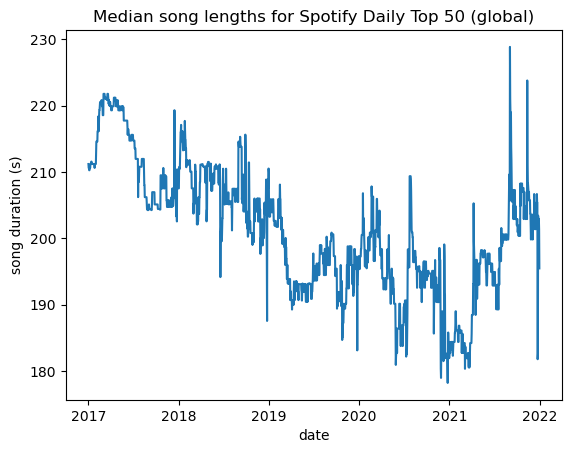

In [47]:
sns.lineplot(song_lengths)
plt.title("Median song lengths for Spotify Daily Top 50 (global)")

### Countries with most songs streamed

In [98]:
streams = countries_charts.groupby(["region", "date"]).streams.sum().sort_values(ascending=False).reset_index().set_index("date")
streams

,region,streams
date,,
2021-09-03,United States,107186728.0
2018-06-29,United States,104387689.0
2020-12-25,United States,92143610.0
2021-12-25,United States,85469959.0
2018-06-30,United States,82462231.0
...,...,...
2017-01-01,Greece,59509.0
2017-01-01,Iceland,58313.0
2017-01-05,Slovakia,54583.0


<AxesSubplot: xlabel='date'>

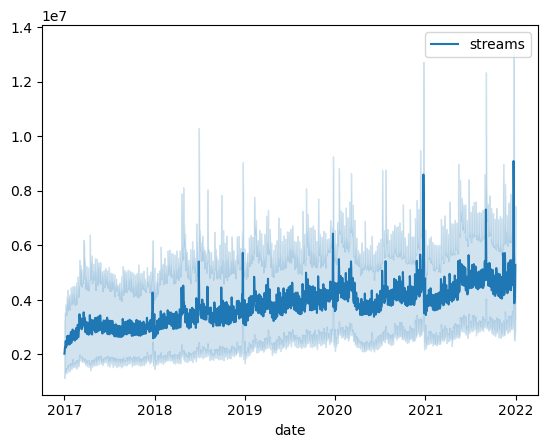

In [59]:
sns.lineplot(streams)

<AxesSubplot: xlabel='date'>

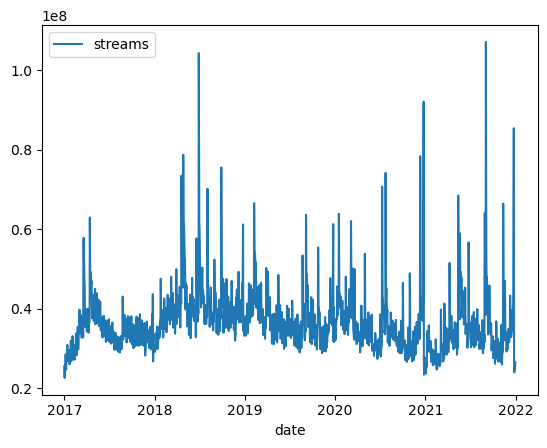

In [60]:
sns.lineplot(streams[streams.region == "United States"])

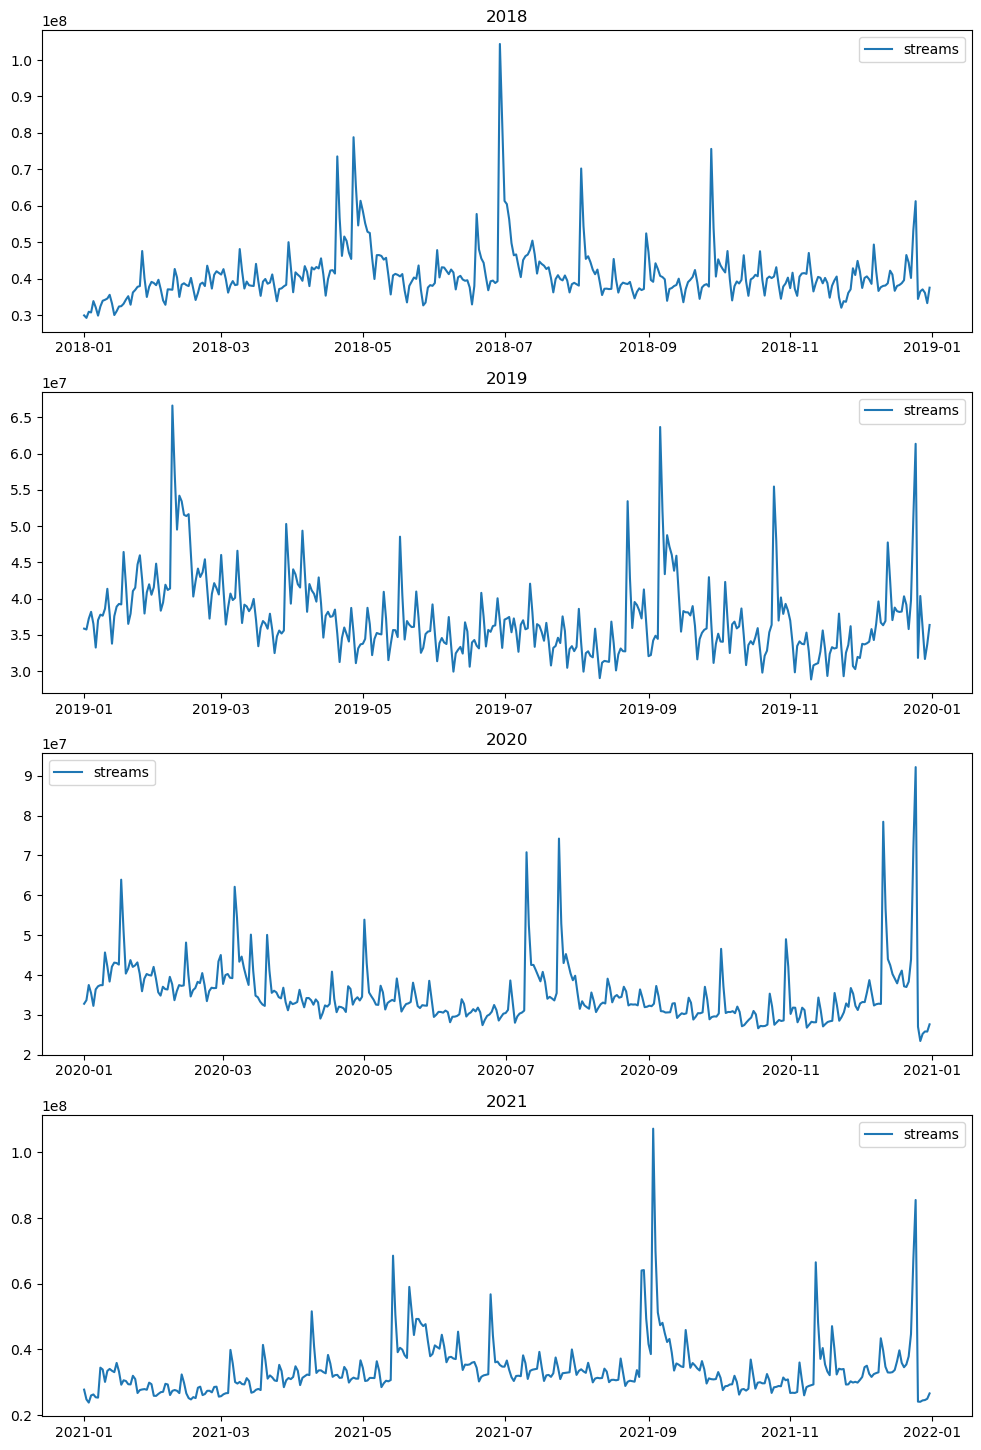

In [79]:
years = list(range(2018, 2022))
fig, axs = plt.subplots(len(years), 1, figsize=(12, 18))
us_streams = streams[streams.region == "United States"]
for i, ax in enumerate(axs.ravel()):
  year = years[i]
  year_range = pd.date_range(f"{year}-01-01", f"{year}-12-31")
  sns.lineplot(us_streams.loc[year_range], ax=ax)
  ax.set_title(f"{year}")

plt.show()


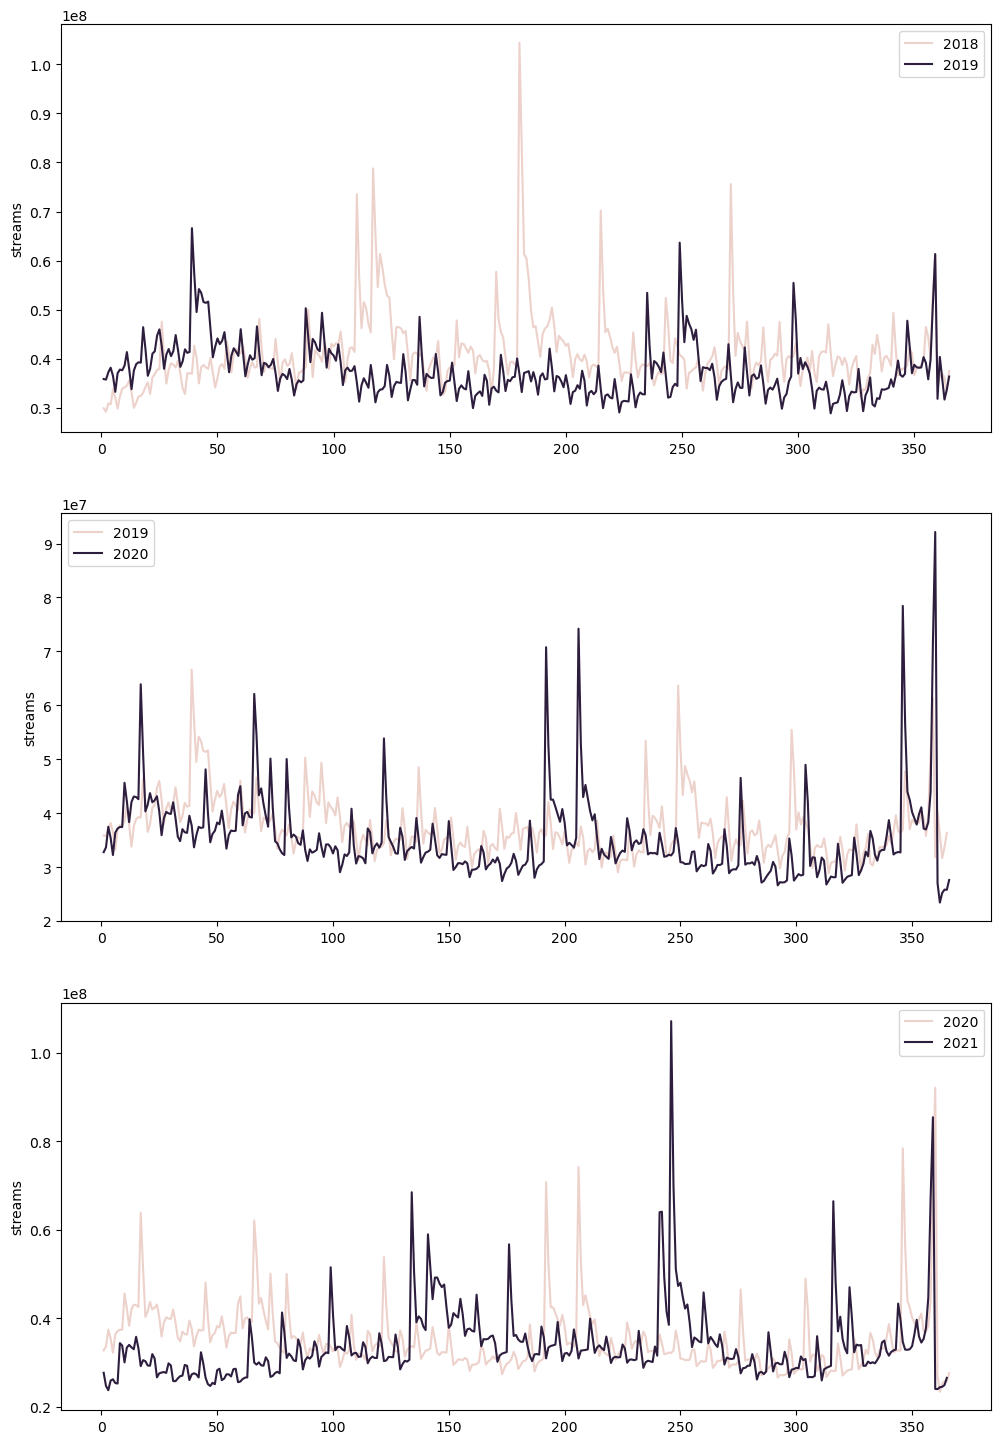

In [103]:

us_streams = streams[streams.region == "United States"]

def plot_streams():
    years = list(range(2019, 2022))
    fig, axs = plt.subplots(len(years), 1, figsize=(12, 18))
    for i, ax in enumerate(axs.ravel()):
        
        year = years[i]
        prev_year = year - 1
        date_range = pd.date_range(f"{prev_year}-01-01", f"{year}-12-31")
        streams = us_streams.loc[date_range]
        sns.lineplot(
            x=streams.index.dayofyear,
            y=streams["streams"],
            hue=streams.index.year,
            ax=ax,
        )
    plt.show()

plot_streams()
